In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
collection=pd.read_csv("C:\\Users\\MARIEM\\Desktop\\stage\\test-db.cleanedLinkedInProfile.csv")
#collection.head()

In [1]:
from pymongo import MongoClient
import pandas as pd


class DaoDataCleaningMS:

    def __init__(self, db_url='localhost', db_port=27017, db_name='test-db', cl_name='cleanedLinkedInProfile'):

        # database setup
        self.client = MongoClient(db_url, db_port)
        self.db = self.client[db_name]
        self.collection = self.db[cl_name]

    def export_data_as_df(self):
        data = []
        for one_candidate in self.collection.find():
            data.append(one_candidate)
        df = pd.DataFrame(data)
        return df


In [2]:
import numpy as np
import time
import scipy.cluster.hierarchy as sch
import itertools
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from copy import deepcopy
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.neighbors.nearest_centroid import NearestCentroid
import re
import itertools as it
import pdb
def calculate_experience_regex(exp): ###########
    if exp is None or not isinstance(exp, str):
        return 0

    years = 0
    months = 0
    if re.search(r'[\d]+ [yrs]', exp) is not None:
        years = int(re.search(r'[\d]+ [yrs]', exp).group(0).split()[0])
    if re.search(r'[\d]+ [mos]', exp) is not None:
        months = int(re.search(r'[\d]+ [mos]', exp).group(0).split()[0])

    return round(years + months / 12, 2)
def fetch_data(): # 
    dao = DaoDataCleaningMS()
    position_buf = []
    desc_buf = []
    duration_buf = []
    for exps in dao.export_data_as_df()['experience']:
        for e in exps:
            position_buf.append(e.get('position') or "") 
            desc_buf.append(e.get('experienceDescription') or "") 
            duration_buf.append((e.get('duration') ))
    
    return (position_buf,desc_buf,duration_buf) 
#fetch_data()[0]

In [4]:
import ast #list to dict
d=ast.literal_eval(collection['skillsAndEndorsements'][0])
#d

# Top Skills

In [3]:
L=[]
i=0
dictTopSkills={}
dictKeys=[]
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    if(type(exps)==float):
        L.append(exps)
    else:
        for i in exps['topSkills']:
            dictTopSkills[i['name']]=list()
dictKeys=dictTopSkills.keys()          
#print(dictTopSkills)

In [4]:
top_skills=[]
for i in dictKeys:
    top_skills.append(i)
#top_skills    


In [5]:

top_skills

['J2EE Application Development',
 'Android Development',
 'Blackberry',
 'JavaScript',
 'Java',
 'C++',
 'PHP4/5',
 'Angular 6',
 'Spring Framework',
 'angular 6',
 'SQL',
 'Spring Batch',
 'angular 2+',
 'Spring Boot',
 'Mongo DB',
 'Java/J2EE',
 'Angular',
 'DevOps (Jenkins,Nexus,SonarQube,Docker,Nginx)',
 'Management',
 'PL/SQL',
 'Project Management',
 'windev',
 'Développement pour Android',
 'JAVA/J2EE',
 'JAVA, JEE',
 'UML',
 'Microsoft SQL Server',
 'MySQL',
 'Business Intelligence',
 'Data Integration',
 'Data Mining',
 'Arduino',
 'Oracle SQL Developer',
 'JMeter',
 'Design logos',
 'jQuery',
 'AngularJS',
 'Java Enterprise Edition',
 'J2EE Web Services',
 'IOT LoRa',
 'J2EE',
 'Intégration',
 'Planification stratégique',
 "Gestion d'équipe",
 'Angular JS',
 'C#',
 'Oracle Database',
 'JBoss EAP',
 'Crystal Reports',
 'Analyses des données',
 'Service client',
 'Microsoft Office',
 "maitrise des systèmes d'exploitation",
 '•\tBase de système d’exploitation Linux',
 '•\tApplic

In [7]:
len(dictTopSkills['Java'])

0

In [135]:
#dao_skill.export_data_as_df()['skillsAndEndorsements']

In [136]:
#for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    #print(exps['topSkills'],"\n")

In [137]:
#collection.drop(columns='c',axis=1,inplace=True)
#collection
for k in dictTopSkills.keys(): #initialiser dicttionnaire vide
    dictTopSkills[k]=list()
print(len(dictTopSkills['Java']))
L=[]
i=0
j=0
k=0
S=0
S1=0
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    S+=1
    #print(exps)
    if(type(exps)==float):
        S1+=1
        for i in top_skills:
            dictTopSkills[i].append(0)
            #print (dictTopSkills[k['name']])
    else:
        #print(exps['topSkills']) #liste
        #print(type(k))
        for k in exps['topSkills']:
            L.append(k['name'])
        for j in top_skills:
                if(j in L):
                    dictTopSkills[j].append(1)
                else:
                    dictTopSkills[j].append(0)


0


# TopSkillsEndo

In [215]:
L=[]
k=0
j=0
dictTopSkillsEndo={}
dictKeysEndo=[]
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    if(type(exps)==float):
        L.append(exps)
    else:
        for i in exps['topSkills']:
            dictTopSkillsEndo[i["name"]]=list()


In [220]:
for k in dictTopSkillsEndo.keys(): #initialiser dicttionnaire vide
    dictTopSkillsEndo[k]=list()
print(len(dictTopSkillsEndo['Java']))
L=[]
i=0
j=0
k=0
S=0
S2=0
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    #print(exps)
    if(type(exps)==float):
        for i in top_skills:
            dictTopSkillsEndo[i].append(0)
            #print (dictTopSkills[k['name']])
    else:
        #print(exps['topSkills']) #liste
        #print(type(k))
        for k in exps['topSkills']:
            L.append(k['name'])
        for j in top_skills:
            if (j in L):
                if((k['endorsements']=='99+')|(k['endorsements']=='+ de 99')):
                    dictTopSkillsEndo[j].append(99)
                else:
                    dictTopSkillsEndo[j].append(int(k['endorsements']))
            else:
                dictTopSkillsEndo[j].append(0)

0


In [14]:
#dictTopSkillsEndo['Android Development']

# Skills 

In [5]:
L=[]
i=0
dictSkills={}
skillKeys=[]
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    if(type(exps)==float):
        L.append(exps)
    else:
        if(len(exps)==2):
            for i in exps['skills']:
                dictSkills[i['name']]=list()
skillKeys=dictSkills.keys()          
#dictSkills


In [13]:
skills=[]
for i in skillKeys:
    skills.append(i)
#len(skills) 

NameError: name 'skillKeys' is not defined

In [219]:
#collection.drop(columns='c',axis=1,inplace=True)
#collection
for k in dictSkills.keys(): #initialiser dicttionnaire vide
    dictSkills[k]=list()
print(len(dictSkills['Langues']))
i=0
j=0
l=[]
dao_skill = DaoDataCleaningMS()
for exps in dao_skill.export_data_as_df()['skillsAndEndorsements']:
    if(type(exps)==float):
        for i in skills:
            dictSkills[i].append(0)
    else:
        sommeEndo=0
        if("skills" in exps):
            for k in exps["skills"]:
                l.append(k['name'])
            for j in skills:
                if (j in l):
                    sommeEndo=sommeEndo+len(k["skillList"])
                else:
                    sommeEndo=0
                dictSkills[j].append(sommeEndo)
        else:
            for n in skills:
                dictSkills[n].append(0)


NameError: name 'dictSkills' is not defined

KeyError: 'Compétences interpersonnelles'

In [144]:
i=0
for k in top_skills:
    collection[k]=dictTopSkills[k]


In [221]:
for k in top_skills:
    collection[k+'Endo']=dictTopSkillsEndo[k]

ValueError: Length of values does not match length of index

In [43]:
#collection["JavaEndo"]

In [163]:
collection.drop(columns='Unnamed: 0',axis=1,inplace=True)



In [6]:
#collection.columns


In [46]:

#collection['Magento2']


In [47]:
#collection['Instrumentation']


In [165]:
for k in skills:
    collection[k]=dictSkills[k]

In [7]:
#collection

In [8]:
#collection['umlEndo']


In [175]:
collection.to_csv("newData1.csv",sep=',')

In [6]:
import pandas as pd
newData=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\newData1.csv",encoding="Latin")

In [7]:
newData

,Unnamed: 0,_id,age,totalExperience,J2EE Application Development,Android Development,Blackberry,JavaScript,Java,C++,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,0,5c90fe256321571e4ac9ba9b,22,52,1,1,1,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,1,5c90fdd26321571e4ac9ba9a,19,20,1,1,1,1,1,1,...,7,14,21,0,0,0,0,0,0,0
2,2,5c90ff1f6321571e4ac9ba9d,18,3,1,1,1,1,1,1,...,19,38,57,0,0,0,0,0,0,0
3,3,5c90ff7c6321571e4ac9ba9e,19,20,1,1,1,1,1,1,...,7,14,21,0,0,0,0,0,0,0
4,4,5c91000a6321571e4ac9ba9f,21,42,1,1,1,1,1,1,...,4,8,12,0,0,0,0,0,0,0
5,5,5c91004c6321571e4ac9baa0,18,5,1,1,1,1,1,1,...,6,12,18,0,0,0,0,0,0,0
6,6,5c90fe906321571e4ac9ba9c,19,22,1,1,1,1,1,1,...,5,10,15,0,0,0,0,0,0,0
7,7,5c91012a63215720ae150f0d,19,15,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,8,5c9100dd63215720ae150f0c,20,31,1,1,1,1,1,1,...,8,16,24,0,0,0,0,0,0,0
9,9,5c91017b63215720ae150f0e,29,141,1,1,1,1,1,1,...,1,2,3,0,0,0,0,0,0,0


In [8]:
newData.drop(columns='Unnamed: 0',axis=1,inplace=True)


In [9]:
newData

,_id,age,totalExperience,J2EE Application Development,Android Development,Blackberry,JavaScript,Java,C++,PHP4/5,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,5c90fe256321571e4ac9ba9b,22,52,1,1,1,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,5c90fdd26321571e4ac9ba9a,19,20,1,1,1,1,1,1,0,...,7,14,21,0,0,0,0,0,0,0
2,5c90ff1f6321571e4ac9ba9d,18,3,1,1,1,1,1,1,1,...,19,38,57,0,0,0,0,0,0,0
3,5c90ff7c6321571e4ac9ba9e,19,20,1,1,1,1,1,1,1,...,7,14,21,0,0,0,0,0,0,0
4,5c91000a6321571e4ac9ba9f,21,42,1,1,1,1,1,1,1,...,4,8,12,0,0,0,0,0,0,0
5,5c91004c6321571e4ac9baa0,18,5,1,1,1,1,1,1,1,...,6,12,18,0,0,0,0,0,0,0
6,5c90fe906321571e4ac9ba9c,19,22,1,1,1,1,1,1,1,...,5,10,15,0,0,0,0,0,0,0
7,5c91012a63215720ae150f0d,19,15,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,5c9100dd63215720ae150f0c,20,31,1,1,1,1,1,1,1,...,8,16,24,0,0,0,0,0,0,0
9,5c91017b63215720ae150f0e,29,141,1,1,1,1,1,1,1,...,1,2,3,0,0,0,0,0,0,0


In [8]:
from pymongo import MongoClient
import pandas as pd


class DaoDataCleaningNew:

    def __init__(self, db_url='localhost', db_port=27017, db_name='test-db', cl_name='newData1'):

        # database setup
        self.client = MongoClient(db_url, db_port)
        self.db = self.client[db_name]
        self.collection = self.db[cl_name]

    def export_data_as_df(self):
        data = []
        for one_candidate in self.collection.find():
            data.append(one_candidate)
        df = pd.DataFrame(data)
        return df
    def normalisation(self):
        data = []
        for one_candidate in self.collection.find():
            data.append(one_candidate)
        df = pd.DataFrame(data)
        return df
        

In [32]:
import pandas as pd
newData=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\newData1.csv",encoding="Latin")

In [33]:
newData.drop(columns='Unnamed: 0',axis=1,inplace=True)


In [34]:
newData

,_id,age,totalExperience,J2EE Application Development,Android Development,Blackberry,JavaScript,Java,C++,PHP4/5,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,5c90fe256321571e4ac9ba9b,22,52,1,1,1,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,5c90fdd26321571e4ac9ba9a,19,20,1,1,1,1,1,1,0,...,7,14,21,0,0,0,0,0,0,0
2,5c90ff1f6321571e4ac9ba9d,18,3,1,1,1,1,1,1,1,...,19,38,57,0,0,0,0,0,0,0
3,5c90ff7c6321571e4ac9ba9e,19,20,1,1,1,1,1,1,1,...,7,14,21,0,0,0,0,0,0,0
4,5c91000a6321571e4ac9ba9f,21,42,1,1,1,1,1,1,1,...,4,8,12,0,0,0,0,0,0,0
5,5c91004c6321571e4ac9baa0,18,5,1,1,1,1,1,1,1,...,6,12,18,0,0,0,0,0,0,0
6,5c90fe906321571e4ac9ba9c,19,22,1,1,1,1,1,1,1,...,5,10,15,0,0,0,0,0,0,0
7,5c91012a63215720ae150f0d,19,15,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,5c9100dd63215720ae150f0c,20,31,1,1,1,1,1,1,1,...,8,16,24,0,0,0,0,0,0,0
9,5c91017b63215720ae150f0e,29,141,1,1,1,1,1,1,1,...,1,2,3,0,0,0,0,0,0,0


In [11]:
#newData['_id']['1c90fe256321571e4ac9ba9b']

In [19]:
newData.to_csv("newMl.csv",sep=',')

In [9]:
newML=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\newMl.csv")


newML

In [10]:
newML


,Unnamed: 0,age,totalExperience,J2EE Application Development,Android Development,Blackberry,JavaScript,Java,C++,PHP4/5,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,0,22,52,1,1,1,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,1,19,20,1,1,1,1,1,1,0,...,7,14,21,0,0,0,0,0,0,0
2,2,18,3,1,1,1,1,1,1,1,...,19,38,57,0,0,0,0,0,0,0
3,3,19,20,1,1,1,1,1,1,1,...,7,14,21,0,0,0,0,0,0,0
4,4,21,42,1,1,1,1,1,1,1,...,4,8,12,0,0,0,0,0,0,0
5,5,18,5,1,1,1,1,1,1,1,...,6,12,18,0,0,0,0,0,0,0
6,6,19,22,1,1,1,1,1,1,1,...,5,10,15,0,0,0,0,0,0,0
7,7,19,15,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,8,20,31,1,1,1,1,1,1,1,...,8,16,24,0,0,0,0,0,0,0
9,9,29,141,1,1,1,1,1,1,1,...,1,2,3,0,0,0,0,0,0,0


In [22]:
newML.drop(columns='Unnamed: 0',axis=1,inplace=True)


In [12]:
#newML

In [11]:
import numpy as np
r=np.loadtxt(open("C:\\Users\\MARIEM\\1essaie\\newMl.csv", "rb"), delimiter=",", skiprows=1)

In [12]:
type(r)

numpy.ndarray

In [13]:
r.shape

(2127, 1843)

In [19]:
r[0][1]

22.0

In [142]:
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=5, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter
    
    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []
        
        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])
        
        for i in range(self.max_iter):  
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []
            
            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []
                
                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))
                    
                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])   
                
                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))
                
                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp
                    
            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c ,self.clustered_data
    
    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))
    
    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred    
    

In [15]:
km=KMeans_numpy()
a,b= km.fit(r)
len(b)

C:\Users\MARIEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\MARIEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


5

In [16]:
premier_cluster = np.array(b[0])
deuxieme_cluster = np.array(b[1])
troisieme_cluster = np.array(b[2])
quatrième_cluster = np.array(b[3])
cinquième_cluster = np.array(b[4])

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from bson import ObjectId
from scipy.spatial import distance
df=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\newMl.csv")
pca_reducer = PCA(n_components=3)
reduced_data = pca_reducer.fit_transform(df)
# reduced_data_df=pd.DataFrame({'pc1': reduced_data[:,0], 'pc2' : reduced_data[:,1]})
reduced_data_df=pd.DataFrame({'pc1': reduced_data[:,0], 'pc2' : reduced_data[:,1],'pc3' : reduced_data[:,2]})



In [18]:
reduced_data_df

,pc1,pc2,pc3
0,-1064.270938,-40.249698,19.858011
1,-1063.066811,-35.420096,18.838871
2,-1061.953835,-41.678158,26.327418
3,-1061.092245,-33.378223,18.367260
4,-1060.211518,-40.212793,20.205539
5,-1058.872008,-40.688029,16.928937
6,-1058.023053,-41.383917,18.464044
7,-1056.900128,-42.785160,14.189964
8,-1056.187803,-36.594387,20.810287
9,-1056.187655,-36.715487,29.872158


In [37]:
i=0
print(len(premier_cluster))
print(len(deuxieme_cluster))
print(len(troisieme_cluster))
print(len(quatrième_cluster))
print(len(cinquième_cluster))

347
315
507
450
508


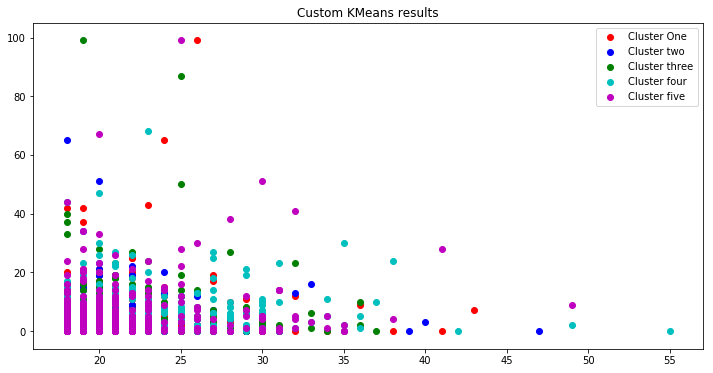

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(premier_cluster[:, 1], premier_cluster[:,1000], c='r', label='Cluster One')
plt.scatter(deuxieme_cluster[:, 1], deuxieme_cluster[:, 1000], c='b', label='Cluster two')
plt.scatter(troisieme_cluster[:, 1], troisieme_cluster[:, 1000 ], c='g', label='Cluster three')
plt.scatter(quatrième_cluster[:, 1], quatrième_cluster[:, 1000], c='c', label='Cluster four')
plt.scatter(cinquième_cluster[:, 1], cinquième_cluster[:, 1000], c='m', label='Cluster five')
plt.title("Custom KMeans results")
plt.legend()
plt.show()


In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from bson import ObjectId

from scipy.spatial import distance
pca_reducer = PCA(n_components=2)
cluster_two_data_reduced = pca_reducer.fit_transform(deuxieme_cluster)
pca_reducer = PCA(n_components=2)
cluster_three_data_reduced = pca_reducer.fit_transform(troisieme_cluster)
pca_reducer = PCA(n_components=2)
cluster_four_data_reduced = pca_reducer.fit_transform(quatrième_cluster)
pca_reducer = PCA(n_components=2)
cluster_five_data_reduced = pca_reducer.fit_transform(cinquième_cluster)
pca_reducer = PCA(n_components=2)
cluster_one_data_reduced = pca_reducer.fit_transform(premier_cluster)

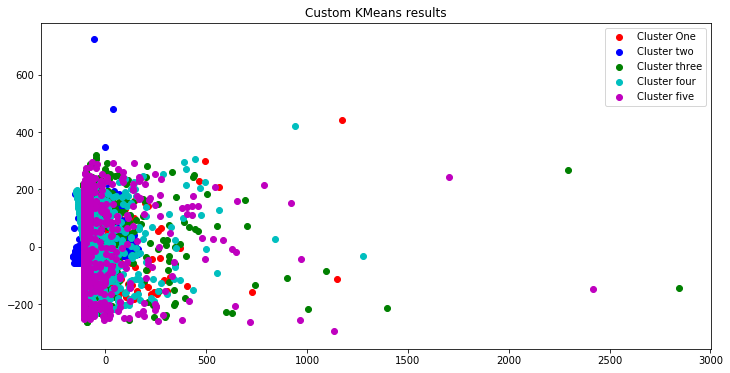

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data_reduced[:, 0], cluster_one_data_reduced[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data_reduced[:, 0], cluster_two_data_reduced[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data_reduced[:, 0], cluster_three_data_reduced[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data_reduced[:, 0], cluster_four_data_reduced[:, 1], c='c', label='Cluster four')
plt.scatter(cluster_five_data_reduced[:, 0], cluster_five_data_reduced[:, 1], c='m', label='Cluster five')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

In [29]:
newData.drop(columns='age',axis=1,inplace=True)


In [45]:
newData

,J2EE Application Development,Android Development,Blackberry,JavaScript,Java,C++,PHP4/5,Angular 6,Spring Framework,angular 6,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,1,1,1,0,0,0,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,...,19,38,57,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,...,7,14,21,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,4,8,12,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,1,1,1,...,6,12,18,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,...,5,10,15,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,1,...,8,16,24,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,...,1,2,3,0,0,0,0,0,0,0


In [44]:
dist={}
for row in newData['_id']:
    dist[row]= list()
    

In [45]:
len(dist)

2127

In [46]:
#newData.drop(columns='age',axis=1,inplace=True)
#newData.drop(columns='_id',axis=1,inplace=True)
newData.drop(columns='totalExperience',axis=1,inplace=True)


In [47]:
listNewData=[]
for i in newData.columns:
    listNewData.append(i)

In [50]:
cluster1=[]
i=0
for i in range(len(b[0])):
    cluster1.append(newData['_id'][b[0][i][0]])

In [51]:
len(cluster1)

347

In [52]:
cluster2=[]
i=0
for i in range(len(deuxieme_cluster)):
    cluster2.append(newData['_id'][deuxieme_cluster[i][0]])

In [53]:
len(cluster2)

315

In [54]:
cluster3=[]
i=0
for i in range(len(troisieme_cluster)):
    cluster3.append(newData['_id'][troisieme_cluster[i][0]])

In [55]:
cluster4=[]
i=0
for i in range(len(quatrième_cluster)):
    cluster4.append(newData['_id'][quatrième_cluster[i][0]])

In [56]:
cluster5=[]
i=0
for i in range(len(cinquième_cluster)):
    cluster5.append(newData['_id'][cinquième_cluster[i][0]])

In [58]:
#cluster5

In [63]:
dictTopSkills

NameError: name 'dictTopSkills' is not defined

In [457]:
#newML.drop(columns='dÃ©veloppeur Metatrader 4-5',axis=1,inplace=True)
newML.drop(columns='C/AL',axis=1,inplace=True)


In [11]:
#newML

In [196]:
newML.columns

Index(['Unnamed: 0', 'age', 'totalExperience', 'Gestion d'Ã©quipe',
       'maitrise des systÃ¨mes d'exploitation',
       'â¢\tApplication: Cisco, Matlab, STM32, WinCC, Step7',
       'spring Framework(Core Container, AOP, BATCH, WEB, SECURITY, WS, TEST)',
       'dÃ©veloppeur  Metatrader 4-5',
       'dÃ©veloppeur Smart Contract [Solidity]', 'Journalisme',
       ...
       'Tools & Technologies', 'Other Skills', 'Industry Knowledge',
       'Interpersonal Skills', 'Languages', 'Outils et technologie',
       'Autres compÃ©tences', 'Connaissances du secteur',
       'CompÃ©tences interpersonnelles', 'Langues'],
      dtype='object', length=1676)

In [10]:

top_skills

['J2EE Application Development',
 'Android Development',
 'Blackberry',
 'JavaScript',
 'Java',
 'C++',
 'PHP4/5',
 'Angular 6',
 'Spring Framework',
 'angular 6',
 'SQL',
 'Spring Batch',
 'angular 2+',
 'Spring Boot',
 'Mongo DB',
 'Java/J2EE',
 'Angular',
 'DevOps (Jenkins,Nexus,SonarQube,Docker,Nginx)',
 'Management',
 'PL/SQL',
 'Project Management',
 'windev',
 'Développement pour Android',
 'JAVA/J2EE',
 'JAVA, JEE',
 'UML',
 'Microsoft SQL Server',
 'MySQL',
 'Business Intelligence',
 'Data Integration',
 'Data Mining',
 'Arduino',
 'Oracle SQL Developer',
 'JMeter',
 'Design logos',
 'jQuery',
 'AngularJS',
 'Java Enterprise Edition',
 'J2EE Web Services',
 'IOT LoRa',
 'J2EE',
 'Intégration',
 'Planification stratégique',
 "Gestion d'équipe",
 'Angular JS',
 'C#',
 'Oracle Database',
 'JBoss EAP',
 'Crystal Reports',
 'Analyses des données',
 'Service client',
 'Microsoft Office',
 "maitrise des systèmes d'exploitation",
 '•\tBase de système d’exploitation Linux',
 '•\tApplic

In [13]:
#newData

In [106]:
newData.drop(columns='Java JEE (Spring boot)',axis=1,inplace=True)
newData.drop(columns='Jihepster',axis=1,inplace=True)
newData.drop(columns='Spring Cloud',axis=1,inplace=True)
newData.drop(columns='Angular 2 /4',axis=1,inplace=True)
newData.drop(columns='Apache Cordova',axis=1,inplace=True)
newData.drop(columns='.NET framework',axis=1,inplace=True)
newData.drop(columns='Blogging',axis=1,inplace=True)
newData.drop(columns='Database Administration',axis=1,inplace=True)
newData.drop(columns='react js,',axis=1,inplace=True)
newData.drop(columns='Software Project Management',axis=1,inplace=True)
newData.drop(columns='System Administrator',axis=1,inplace=True)
newData.drop(columns='Hyperledger Composer',axis=1,inplace=True)
newData.drop(columns='Active Directory',axis=1,inplace=True)
newData.drop(columns='Virtualization',axis=1,inplace=True)


In [90]:
newData.to_csv("Data.csv",sep=',')

In [91]:
Data

NameError: name 'Data' is not defined

In [92]:
Collection=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\Data.csv")


In [95]:
#Collection

In [96]:
#newData

In [126]:
L=[

 'ENTITY FRAMEWORK',
 'Reactjs']

In [127]:
for i in L:
    newData.drop(columns=i,axis=1,inplace=True)


In [128]:
newData

,_id,age,totalExperience,JavaScript,PL/SQL,DÃ©veloppement pour Android,IntÃ©gration,Planification stratÃ©gique,Gestion d'Ã©quipe,Analyses des donnÃ©es,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,5c90fe256321571e4ac9ba9b,22,52,0,0,0,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,5c90fdd26321571e4ac9ba9a,19,20,1,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
2,5c90ff1f6321571e4ac9ba9d,18,3,1,0,0,0,0,0,0,...,19,38,57,0,0,0,0,0,0,0
3,5c90ff7c6321571e4ac9ba9e,19,20,1,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
4,5c91000a6321571e4ac9ba9f,21,42,1,0,0,0,0,0,0,...,4,8,12,0,0,0,0,0,0,0
5,5c91004c6321571e4ac9baa0,18,5,1,0,0,0,0,0,0,...,6,12,18,0,0,0,0,0,0,0
6,5c90fe906321571e4ac9ba9c,19,22,1,0,0,0,0,0,0,...,5,10,15,0,0,0,0,0,0,0
7,5c91012a63215720ae150f0d,19,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5c9100dd63215720ae150f0c,20,31,1,0,0,0,0,0,0,...,8,16,24,0,0,0,0,0,0,0
9,5c91017b63215720ae150f0e,29,141,1,1,0,0,0,0,0,...,1,2,3,0,0,0,0,0,0,0


In [129]:
newData.to_csv("Data1.csv",sep=',')

In [130]:
Col1=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\Data1.csv")


In [131]:
Col1

,Unnamed: 0,_id,age,totalExperience,JavaScript,PL/SQL,DÃ©veloppement pour Android,IntÃ©gration,Planification stratÃ©gique,Gestion d'Ã©quipe,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,0,5c90fe256321571e4ac9ba9b,22,52,0,0,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,1,5c90fdd26321571e4ac9ba9a,19,20,1,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
2,2,5c90ff1f6321571e4ac9ba9d,18,3,1,0,0,0,0,0,...,19,38,57,0,0,0,0,0,0,0
3,3,5c90ff7c6321571e4ac9ba9e,19,20,1,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
4,4,5c91000a6321571e4ac9ba9f,21,42,1,0,0,0,0,0,...,4,8,12,0,0,0,0,0,0,0
5,5,5c91004c6321571e4ac9baa0,18,5,1,0,0,0,0,0,...,6,12,18,0,0,0,0,0,0,0
6,6,5c90fe906321571e4ac9ba9c,19,22,1,0,0,0,0,0,...,5,10,15,0,0,0,0,0,0,0
7,7,5c91012a63215720ae150f0d,19,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,5c9100dd63215720ae150f0c,20,31,1,0,0,0,0,0,...,8,16,24,0,0,0,0,0,0,0
9,9,5c91017b63215720ae150f0e,29,141,1,1,0,0,0,0,...,1,2,3,0,0,0,0,0,0,0


In [135]:
Col1.drop(columns="_id",axis=1,inplace=True)


In [136]:
Col1

,age,totalExperience,JavaScript,PL/SQL,DÃ©veloppement pour Android,IntÃ©gration,Planification stratÃ©gique,Gestion d'Ã©quipe,Analyses des donnÃ©es,maitrise des systÃ¨mes d'exploitation,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,22,52,0,0,0,0,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,19,20,1,0,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
2,18,3,1,0,0,0,0,0,0,0,...,19,38,57,0,0,0,0,0,0,0
3,19,20,1,0,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
4,21,42,1,0,0,0,0,0,0,0,...,4,8,12,0,0,0,0,0,0,0
5,18,5,1,0,0,0,0,0,0,0,...,6,12,18,0,0,0,0,0,0,0
6,19,22,1,0,0,0,0,0,0,0,...,5,10,15,0,0,0,0,0,0,0
7,19,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,31,1,0,0,0,0,0,0,0,...,8,16,24,0,0,0,0,0,0,0
9,29,141,1,1,0,0,0,0,0,0,...,1,2,3,0,0,0,0,0,0,0


ValueError: could not convert string to float: '5c90fe256321571e4ac9ba9b'

In [138]:
Col1.to_csv("Data2.csv",sep=',')

In [139]:
Col2=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\Data2.csv")

In [140]:
Col2

,Unnamed: 0,age,totalExperience,JavaScript,PL/SQL,DÃ©veloppement pour Android,IntÃ©gration,Planification stratÃ©gique,Gestion d'Ã©quipe,Analyses des donnÃ©es,...,Tools & Technologies,Other Skills,Industry Knowledge,Interpersonal Skills,Languages,Outils et technologie,Autres compÃ©tences,Connaissances du secteur,CompÃ©tences interpersonnelles,Langues
0,0,22,52,0,0,0,0,0,0,0,...,4,8,0,0,0,0,0,0,0,0
1,1,19,20,1,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
2,2,18,3,1,0,0,0,0,0,0,...,19,38,57,0,0,0,0,0,0,0
3,3,19,20,1,0,0,0,0,0,0,...,7,14,21,0,0,0,0,0,0,0
4,4,21,42,1,0,0,0,0,0,0,...,4,8,12,0,0,0,0,0,0,0
5,5,18,5,1,0,0,0,0,0,0,...,6,12,18,0,0,0,0,0,0,0
6,6,19,22,1,0,0,0,0,0,0,...,5,10,15,0,0,0,0,0,0,0
7,7,19,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,20,31,1,0,0,0,0,0,0,...,8,16,24,0,0,0,0,0,0,0
9,9,29,141,1,1,0,0,0,0,0,...,1,2,3,0,0,0,0,0,0,0


In [141]:
import numpy as np
r=np.loadtxt(open("C:\\Users\\MARIEM\\1essaie\\Data2.csv", "rb"), delimiter=",", skiprows=1)

In [143]:
km=KMeans_numpy()
a,b= km.fit(r)
len(b)

C:\Users\MARIEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\MARIEM\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


5

In [144]:
premier_cluster = np.array(b[0])
deuxieme_cluster = np.array(b[1])
troisieme_cluster = np.array(b[2])
quatrième_cluster = np.array(b[3])
cinquième_cluster = np.array(b[4])

In [146]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from bson import ObjectId
from scipy.spatial import distance
df=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\Data2.csv")
pca_reducer = PCA(n_components=3)
reduced_data = pca_reducer.fit_transform(df)
# reduced_data_df=pd.DataFrame({'pc1': reduced_data[:,0], 'pc2' : reduced_data[:,1]})
reduced_data_df=pd.DataFrame({'pc1': reduced_data[:,0], 'pc2' : reduced_data[:,1],'pc3' : reduced_data[:,2]})



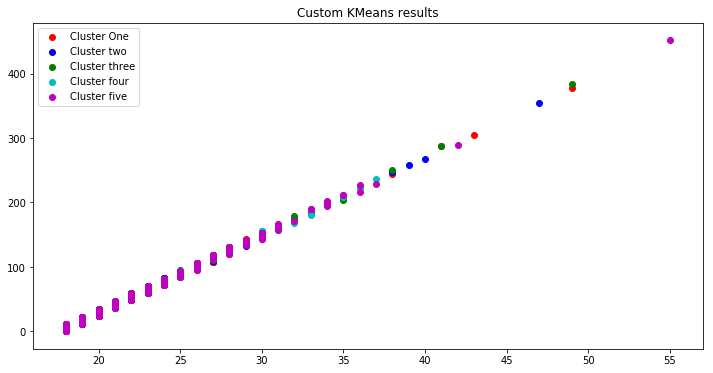

In [148]:
plt.figure(figsize=(12, 6))
plt.scatter(premier_cluster[:, 1], premier_cluster[:,2], c='r', label='Cluster One')
plt.scatter(deuxieme_cluster[:, 1], deuxieme_cluster[:, 2], c='b', label='Cluster two')
plt.scatter(troisieme_cluster[:, 1], troisieme_cluster[:, 2 ], c='g', label='Cluster three')
plt.scatter(quatrième_cluster[:, 1], quatrième_cluster[:, 2], c='c', label='Cluster four')
plt.scatter(cinquième_cluster[:, 1], cinquième_cluster[:, 2], c='m', label='Cluster five')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

In [149]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from bson import ObjectId

from scipy.spatial import distance
pca_reducer = PCA(n_components=2)
cluster_two_data_reduced = pca_reducer.fit_transform(deuxieme_cluster)
pca_reducer = PCA(n_components=2)
cluster_three_data_reduced = pca_reducer.fit_transform(troisieme_cluster)
pca_reducer = PCA(n_components=2)
cluster_four_data_reduced = pca_reducer.fit_transform(quatrième_cluster)
pca_reducer = PCA(n_components=2)
cluster_five_data_reduced = pca_reducer.fit_transform(cinquième_cluster)
pca_reducer = PCA(n_components=2)
cluster_one_data_reduced = pca_reducer.fit_transform(premier_cluster)

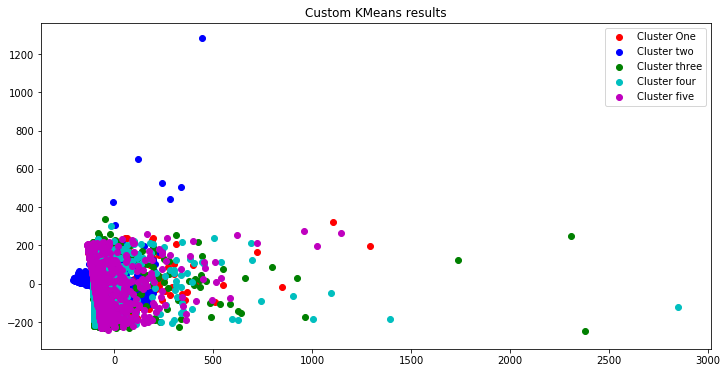

In [150]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data_reduced[:, 0], cluster_one_data_reduced[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data_reduced[:, 0], cluster_two_data_reduced[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data_reduced[:, 0], cluster_three_data_reduced[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data_reduced[:, 0], cluster_four_data_reduced[:, 1], c='c', label='Cluster four')
plt.scatter(cluster_five_data_reduced[:, 0], cluster_five_data_reduced[:, 1], c='m', label='Cluster five')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

In [2]:
collection

,_id,achievements,activities,age,companies,contactInfo,education,experience,groups,influencers,lastModifDate,schools,skillsAndEndorsements,topCard,totalExperience,updatedLocation,url
0,5c90fe256321571e4ac9ba9b,"[ { ""Projects"" : [ ""SMART ALARM"", ""Appplicatio...",NaN,22,"[ { ""name"" : ""Sodifrance-Netapsys"" }, { ""name""...","{ ""URL"" : ""https://www.linkedin.com/in/samehbe...","[ { ""establishment"" : ""Institut national des S...","[ { ""dates"" : ""Nov 2015 – Present"", ""duration""...","[ { ""name"" : ""JavaScript"" } ]",[ ],2019-03-19T14:35:17.083Z,[ ],"{ ""topSkills"" : [ { ""name"" : ""J2EE Application...","{ ""location"" : ""Tunis Governorate, Tunisia"", ""...",52,"Paris , France",https://www.linkedin.com/in/samehbellez/
1,5c90fdd26321571e4ac9ba9a,"[ { ""Languages"" : [ ""Anglais"", ""Français"" ] } ]","[ { ""type"" : "" likes this"", ""activityBy"" : ""ht...",19,"[ { ""name"" : ""IBM"" }, { ""name"" : ""Orange Busin...","{ ""URL"" : ""https://www.linkedin.com/in/donia-h...","[ { ""establishment"" : ""Ecole nationale des sci...","[ { ""dates"" : ""Jul 2018 – Present"", ""duration""...","[ { ""name"" : ""IT Recruiters"" }, { ""name"" : ""CR...",[ ],2019-03-19T14:33:54.688Z,"[ { ""name"" : ""ENSI - Ecole Nationale des Scien...","{ ""topSkills"" : [ { ""name"" : ""JavaScript"", ""en...","{ ""location"" : ""El Hrairia, Tunis Governorate,...",20,Tunisie,https://www.linkedin.com/in/donia-hammami-9023...
2,5c90ff1f6321571e4ac9ba9d,"[ { ""Courses"" : [ ""Administration Avancés des ...","[ { ""type"" : "" likes this"", ""activityBy"" : ""ht...",18,"[ { ""name"" : ""IBM"" }, { ""name"" : ""GE"" }, { ""na...","{ ""URL"" : ""https://www.linkedin.com/in/aymen-m...","[ { ""establishment"" : ""ITGate-Training Tunis"",...","[ { ""dates"" : ""Jan 2019 – Present"", ""duration""...","[ { ""name"" : ""Telecoms Professionals: IoT, LTE...",[ ],2019-03-19T14:39:27.624Z,"[ { ""name"" : ""Ecole Supérieure Privée d'Ingéni...","{ ""topSkills"" : [ { ""name"" : ""Java"", ""endorsem...","{ ""location"" : ""Tunis Governorate, Tunisia"", ""...",3,"Tunis, Tunisia",https://www.linkedin.com/in/aymen-mekni-578680a0/
3,5c90ff7c6321571e4ac9ba9e,"[ { ""Languages"" : [ ""Anglais"", ""Français"" ] } ]",[ ],19,[ ],{ },"[ { ""establishment"" : ""Ecole nationale des sci...","[ { ""dates"" : ""Jul 2018 – Present"", ""duration""...",[ ],[ ],2019-03-19T14:41:00.112Z,[ ],"{ ""topSkills"" : [ { ""name"" : ""JavaScript"", ""en...","{ ""location"" : ""El Hrairia, Tunis Governorate,...",20,Tunisie,https://www.linkedin.com/in/donia-hammami-9023...
4,5c91000a6321571e4ac9ba9f,"[ { ""Projects"" : [ ""Adaming Heads Reports (AHR...","[ { ""type"" : "" likes this"", ""activityBy"" : ""ht...",21,"[ { ""name"" : ""Unilever"" }, { ""name"" : ""LinkedI...","{ ""URL"" : ""https://www.linkedin.com/in/marwen-...","[ { ""establishment"" : ""Ecole Supérieure Privée...","[ { ""dates"" : ""Feb 2018 – Present"", ""duration""...","[ { ""name"" : ""Internet Society"" }, { ""name"" : ...",[ ],2019-03-19T14:43:22.306Z,"[ { ""name"" : ""Ecole Supérieure Privée d'Ingéni...","{ ""topSkills"" : [ { ""name"" : ""Spring Framework...","{ ""location"" : ""Ben Arous Governorate, Tunisia...",42,Tunisie,https://www.linkedin.com/in/marwen-mselmi-6422...
5,5c91004c6321571e4ac9baa0,"[ { ""Languages"" : [ ""Anglais"", ""Arabe"", ""Espag...",[ ],18,[ ],{ },"[ { ""establishment"" : ""Faculté des Sciences Ma...","[ { ""dates"" : ""Nov 2018 – Present"", ""duration""...",[ ],[ ],2019-03-19T14:44:28.715Z,[ ],"{ ""topSkills"" : [ { ""name"" : ""Java"", ""endorsem...","{ ""location"" : ""Courbevoie, Île-de-France, Fra...",5,法国,https://www.linkedin.com/in/insaf-bettaieb-810...
6,5c90fe906321571e4ac9ba9c,[ { } ],"[ { ""type"" : "" likes this"", ""activityBy"" : ""ht...",19,"[ { ""name"" : ""IBM"" }, { ""name"" : ""SAP"" }, { ""n...","{ ""URL"" : ""https://www.linkedin.com/in/rahma-n...","[ { ""establishment"" : ""ISI Ariana"", ""diploma"" ...","[ { ""dates"" : ""Aug 2018 – Present"", ""duration""...","[ { ""nam